![image](https://www.ewatercycle.org/assets/logo.png)

# Preprocessing of hydrological models’ input in eWaterCycle with ESMValTool

As a researcher, I want to process some forcing data retrieved from ERA5. So I can use them as input for hydrological models like lisflood, wflow, and pcrglobwb.

This notebook uses ``forcing`` module from ``ewatercycle`` package to process ERA5 data using ``esmvaltool``. 
The ``forcing`` module finds the location of data, shapefiles and output via esmvaltool ``config-user.yml`` file. To know more, see [documentation on data pre-processing for hydrological models using esmvaltool](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html)

In [ ]:
from ewatercycle import forcing

## Generate forcing for lisflood

In [ ]:
lisflood_output = forcing.generate(
    model='lisflood', 
    dataset='ERA5', 
    startyear=1990, 
    endyear=1990, 
    shapefile='Meuse/Meuse.shp',
    extract_region={
        'start_longitude': 0,
        'end_longitude': 9,
        'start_latitude': 45,
        'end_latitude': 54,
    }
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210421_103459/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210421_103459/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/forcing')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210421_103459/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_lisflood_20210421_103459/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks from recipe
Creating tasks for diagnostic diagnostic_da

## Plot lisflood forcing data

In [5]:
# load and plot forcing data
data_files = list(lisflood_output.recipe_output.values())[0].data_files
data_files

(DataFile('lisflood_ERA5_Meuse_sfcWind_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_rsds_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tasmax_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tasmin_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_e_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_tas_1990_1990.nc'),
 DataFile('lisflood_ERA5_Meuse_pr_1990_1990.nc'))

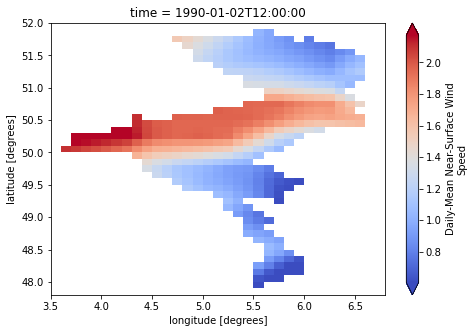

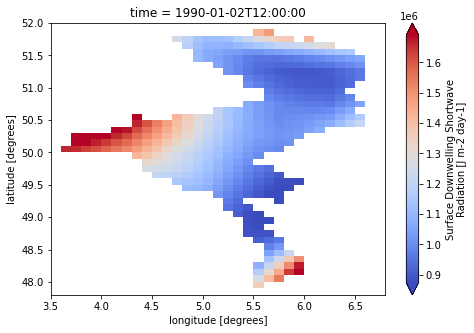

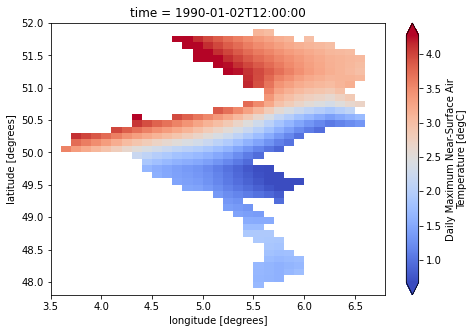

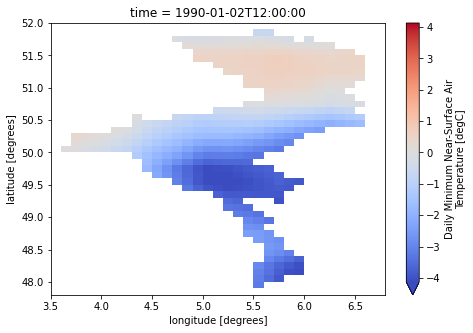

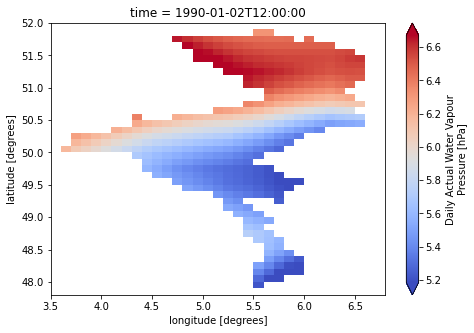

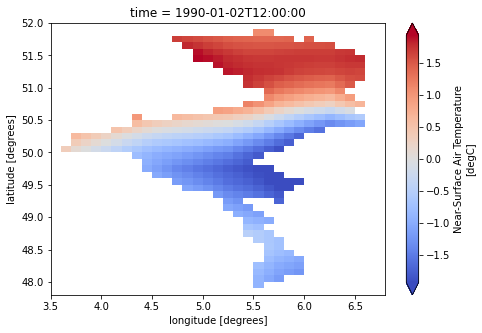

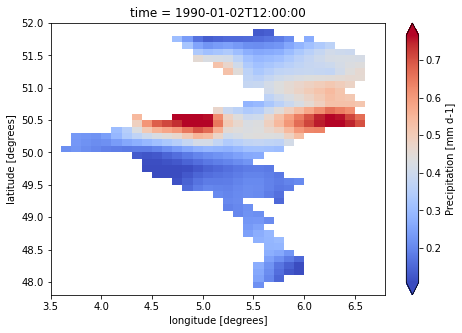

In [7]:
for data_file in data_files:
    dataset = data_file.load_xarray()
    var = list(dataset.data_vars.keys())[0]
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## Generate forcing for wflow

In [2]:
wflow_output = forcing.generate(
    model='wflow', 
    dataset='ERA5', 
    startyear=1990, 
    endyear=1990, 
    dem_file='wflow/wflow_dem.map',
    extract_region={
            'start_longitude': 0,
            'end_longitude': 6.75,
            'start_latitude': 47.25,
            'end_latitude': 52.5,
    },
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210421_094421/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210421_094421/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/forcing')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210421_094421/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_wflow_20210421_094421/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks from recipe
Creating tasks for diagnostic wflow_daily
Creating prep

## Plot wflow forcing data

In [10]:
# load and plot forcing data
data_files = list(wflow_output.recipe_output.values())[0].data_files
print(data_files)

(DataFile('wflow_ERA5_wflow_dem_1990_1990.nc'),)


In [11]:
dataset = data_files[0].load_xarray()
print(dataset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 474, lon: 377, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01T12:00:00 ... 1990-12-31T12:00:00
  * lat        (lat) float64 51.89 51.88 51.87 51.86 ... 47.97 47.96 47.95 47.95
  * lon        (lon) float64 3.571 3.579 3.588 3.596 ... 6.679 6.688 6.696 6.704
    height     float64 2.0
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 0.05978 0.05978 0.05978 ... 12.31 12.31
    time_bnds  (time, bnds) datetime64[ns] 1990-01-01 1990-01-02 ... 1991-01-01
    lat_bnds   (lat, bnds) float64 51.89 51.88 51.88 51.88 ... 47.95 47.95 47.94
    lon_bnds   (lon, bnds) float64 3.567 3.575 3.575 3.583 ... 6.7 6.7 6.708
    tas        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    pet        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    provenance:   <?xml version='1.0' encoding='ASCII'?>\n<prov:document xml

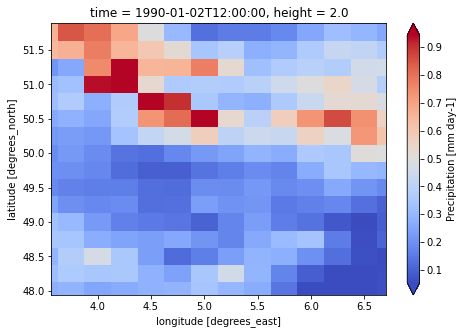

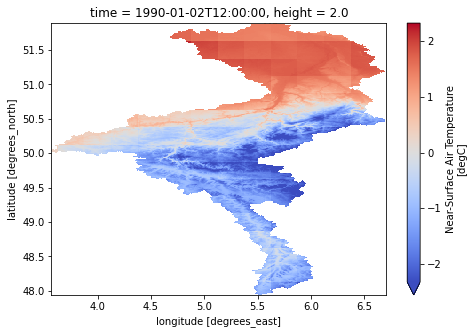

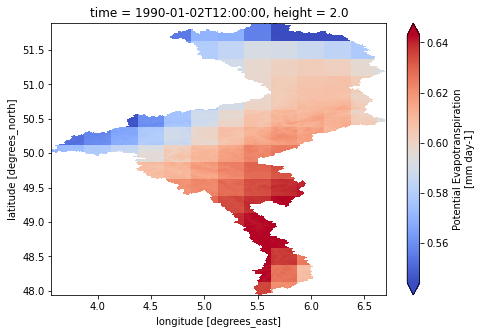

In [8]:
for var in ["pr", "tas", "pet"]:
    dataset[var].isel(time=1).plot(cmap="coolwarm", robust=True, size=5)

## Generate forcing data for pcrglobwb

In [22]:
pcrglobwb_output = forcing.generate(
    model='pcrglobwb', 
    dataset='ERA5', 
    startyear=1991,
    endyear=1991,
    startyear_climatology=1990,
    endyear_climatology=1990,
    basin='rhine',
    extract_region={
        'start_longitude': 3,
        'end_longitude': 13.5,
        'start_latitude': 45,
        'end_latitude': 54,
    },
)

{'auxiliary_data_dir': PosixPath('/home/sarah/temp'),
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/sarah/.esmvaltool/config-user.yml'),
 'drs': {'CMIP5': 'default'},
 'exit_on_warning': False,
 'log_level': 'debug',
 'max_parallel_tasks': 1,
 'output_dir': PosixPath('/home/sarah/temp/output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210421_103333/plots'),
 'preproc_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210421_103333/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'OBS6': [PosixPath('/home/sarah/temp/forcing')]},
 'run_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210421_103333/run'),
 'save_intermediary_cubes': False,
 'work_dir': PosixPath('/home/sarah/temp/output/recipe_pcrglobwb_20210421_103333/work'),
 'write_netcdf': True,
 'write_plots': True}
Creating tasks from recipe
Creating tasks for diagnostic diagnosti

## Plot pcrglobwb forcing data

In [23]:
# load and plot forcing data
data_files = list(pcrglobwb_output.recipe_output.values())[0].data_files
print(data_files)

(DataFile('pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_1991-1991_rhine.nc'), DataFile('pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_1991-1991_rhine.nc'))


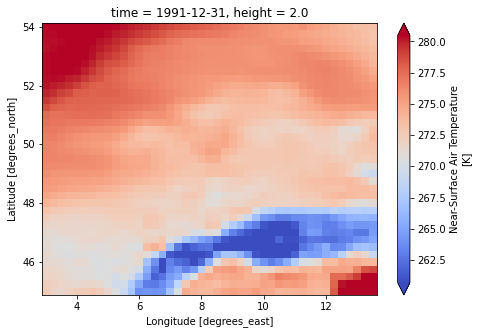

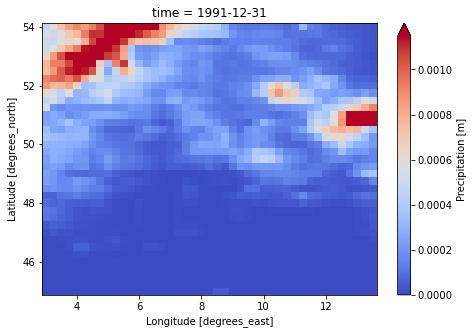

In [24]:
for data_file in data_files:
    dataset = data_file.load_xarray()
    var_name = list(dataset.data_vars.keys())[0]
    dataset[var_name].isel(time=-1).plot(cmap="coolwarm", robust=True, size=5)